In [1]:
#Read in all of the relevant libraries
import numpy as np
import pandas as pd  #Pandas is a nice package for data reading/selection
import math
import scipy as sp
import matplotlib.pyplot as plt
import ellipses as el
from scipy.spatial import ConvexHull

from IPython.display import display
import sys
import pickle
import seaborn
seaborn.set_style('ticks')
%matplotlib inline
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

This notebook is for postprocessing the large numbers of simulations we run with the metapopulations code. It takes a list of file names, reads in those simulations, then can calculate various quantities from those simulations to generate output figures. 

In [2]:
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, phi)

def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)

In [3]:
def Normalize(data):
    nobs = len(data)      #How many 'observations'? (i.e. timesteps)
    dates = np.linspace(0,nobs-1,nobs) 
    dates = (dates)%24     #A year is 24 timesteps, in this code. For whatever reason.
    theta = 2.*np.pi*((dates+1)/24.)
    npatch = np.shape(data)[1]  
    data_norm = np.zeros([nobs,npatch])
    for p in range(npatch):
        nhigh = 0
        '''
        #This loop goes through each *calendar year* and finds the maximum number of individuals.
        maxI = []
        i = 0
        j = 0
        for d in dates:
            if d ==0:
                nhigh = 0
            else:
                if Idata[i,p] > nhigh:
                    nhigh = Idata[i,p]
            if d ==23:
                maxI.append(nhigh)
            i += 1
        '''
        k = 0
        for d in dates:
            #This loop looks forward/backward 12 timesteps and finds the maximum in that window.
            if k<12:
                nhigh = np.max(data[0:k+12,p])
            elif k>1200-12:
                nhigh = np.max(data[k-12:,p])
            else:
                nhigh = np.max(data[k-12:k+12,p])    
            if nhigh==0.:
                nhigh += 1.5      #Don't divide by zero.
            data_norm[k,p] = data[k,p]/float(nhigh)
            if nhigh==1.:   #Only one infection in this window - i.e. probably just a virgin intro. burst
                data_norm[k,p] = 0.
            k += 1
    return data_norm

def AreaCalc(data,tstart=0):
    nobs = len(data) 
    npatch = np.shape(data)[1] 
    dates = np.linspace(0,nobs-1,nobs) 
    dates = (dates)%24     #A year is 24 timesteps, in this code. For whatever reason.
    theta = 2.*np.pi*((dates+1)/24.)
    area = []
    for i in range(npatch):
        thetafit = theta[tstart:]
        Ifit = data[tstart:,i]
        cartcoords = pol2cart(Ifit,thetafit)
        points = np.array(cartcoords)
        points = points.T
        if len(points)>1 and np.max(Ifit)>0.:
            hull = ConvexHull(points)
            area.append(hull.volume)
    return area

In [4]:
#Take a list of files to generate an output for that list. Will be nxm long, where n and m are the number of sims
#for each of the parameters you've looped over (need to tell it n and m)You'll need to set up the filenames so that 
#they actually go in the order you want. 
#to make filelist: ls -1 *.csv | sort -t'_' -n -k2 > filelist.txt
filenames = pd.read_csv('../Sims/test2/filelist.txt',delim_whitespace=True,header=None)
n = 5  #points along first parameter
m = 5  #points along second parameter

In [5]:
#Getting the file names in a workable format
filemat = filenames.values
filemat = filemat.flatten()
npoint = len(filemat)/4
filemat = filemat.reshape([npoint,4])


In [6]:
#'toplot' is the variable that you'll be calculating in order to generate a color map. 
# options: nigh, Ipercent, and ellipse
toplot = 'ellipse'  
#set up a matrix to hold the values of this variable:
plotmat = np.zeros([n,m])

In [7]:
#Select the subset of files you're going to work with (mostly for testing purposes):
'''
files_subset = []
for i in range(n):
    files_subset.append(filemat[:,n*m*i:n*m*(i+1)])
'''
#files_subset now contains nxm (x4, since there are I,S,R,and V files for each sim) 
#files for each of 10 different vaccination variance levels. If you want to make a grid looping over vacc. variance,
#you'll have to change the code quite a bit.

'\nfiles_subset = []\nfor i in range(n):\n    files_subset.append(filemat[:,n*m*i:n*m*(i+1)])\n'

In [8]:
#Select all files with the same vacc. variance.
#files = files_subset[4]
choose = 4 #which vacc. variance do you want to look at? Starts at 1, not 0.
files = filemat[n*m*(choose-1):n*m*choose,:]
print np.shape(files)
print files[0,0]

(25, 4)
cases_75_vaxvar0.5_popvar0.7_pop5000.0_0.csv


0
cases_75_vaxvar0.5_popvar0.7_pop5000.0_0.csv
shape: (172,) mean: 1.0049128496199096
cases_76_vaxvar0.5_popvar0.75_pop5000.0_0.csv
shape: (169,) mean: 1.0118472346777496
cases_77_vaxvar0.5_popvar0.8_pop5000.0_0.csv
shape: (168,) mean: 1.0107489353885792
cases_78_vaxvar0.5_popvar0.85_pop5000.0_0.csv
shape: (164,) mean: 1.0162883023519826
cases_79_vaxvar0.5_popvar0.9_pop5000.0_0.csv
shape: (162,) mean: 1.0113835853414186
1
cases_80_vaxvar0.5_popvar0.7_pop28750.0_0.csv
shape: (379,) mean: 1.102203467401051
cases_81_vaxvar0.5_popvar0.75_pop28750.0_0.csv
shape: (377,) mean: 1.0921764018760813
cases_82_vaxvar0.5_popvar0.8_pop28750.0_0.csv
shape: (374,) mean: 1.0823660794868306
cases_83_vaxvar0.5_popvar0.85_pop28750.0_0.csv
shape: (373,) mean: 1.0827450505325924
cases_84_vaxvar0.5_popvar0.9_pop28750.0_0.csv
shape: (361,) mean: 1.0714679804865221
2
cases_85_vaxvar0.5_popvar0.7_pop52500.0_0.csv
shape: (383,) mean: 1.1190928297275284
cases_86_vaxvar0.5_popvar0.75_pop52500.0_0.csv
shape: (379,) 

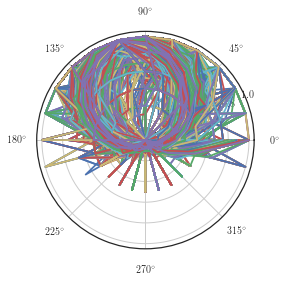

In [12]:
#This loop reads through all of the files and calculates the output variable, storing it in the plotmat matrix.
for i in range(n):
    print i
    for j in range(m):
        #Read in data file
        filenum = i*n+j%m
        print files[filenum,0]
        

        Ifile = pd.read_csv('../Sims/test2/'+files[filenum,0], delim_whitespace=True,header=0)
        Sfile = pd.read_csv('../Sims/test2/'+files[filenum,1], delim_whitespace=True,header=0)
        Rfile = pd.read_csv('../Sims/test2/'+files[filenum,2], delim_whitespace=True, header=0)
        Vfile = pd.read_csv('../Sims/test2/'+files[filenum,3], delim_whitespace=True,header=0)
        
        Idata_all = Ifile.values
        Sdata_all = Sfile.values
        Rdata_all = Rfile.values
        Vdata_all = Vfile.values
                
        Idata_all = Idata_all.astype(float)
        Sdata_all = Sdata_all.astype(float)
        Rdata_all = Rdata_all.astype(float)
        Vdata_all = Vdata_all.astype(float)
        
        tsteps = len(Idata_all[:,0])
        npatch = len(Idata_all[0,:])
        
        burnin = 0.6*len(Idata_all)
        burnin = int(burnin)
        
        Idata = Idata_all[burnin:,:]
        Sdata = Sdata_all[burnin:,:]
        Rdata = Rdata_all[burnin:,:]
        Vdata = Vdata_all[burnin:,:]
        
        '''print j
        if (j-5)%10==0:
            print files[0,filenum]
            plt.plot(Idata)
            '''
        
        #Outbreaks are identified as any string of more than one time-step during which I>0 in a cell.
        if toplot=='Ipercent':
            outsize = np.zeros(npatch)
            k = 1
            while k<(tsteps-burnin):
                for r in range(npatch):
                    if Idata[k,r] > 0.:
                        if Idata[k-1,r] > 0.:
                            outsize[r] += Idata[k,r]
                k += 1

            totinf = sum(outsize)
            totpop = Idata+Sdata+Rdata+Vdata
            totpop = sum(totpop)
            fracinf = outsize/totpop
            print np.shape(outsize)

            plotmat[i,j] = max(fracinf)

        if toplot=='nhigh':
            nhigh = 0
            k = 0
            while k<(tsteps-burnin):
                Ifrac = Idata[k,:]/(Idata[k,:]+Sdata[k,:]+Rdata[k,:]+Vdata[k,:])
                mask = Ifrac>=0.0
                Ihigh = Ifrac[mask]
                x = Ihigh*1.
                nhigh += len(x)
                k+=1
            plotmat[i,j] = nhigh
            
        if toplot=='ellipse':
            nobs = len(Idata)      #How many 'observations'? (i.e. timesteps)
            dates = np.linspace(0,nobs-1,nobs) 
            dates = (dates)%24     #A year is 24 timesteps, in this code. For whatever reason.
            theta = 2.*np.pi*((dates+1)/24.)
            Idata_normed = Normalize(Idata)
            plt.polar(theta,Idata_normed)
            Areas = AreaCalc(Idata_normed)
            print 'shape:',np.shape(Areas), 'mean:', np.mean(Areas)
            plotmat[i,j] = np.mean(Areas)
    

In [13]:
#Fix the ordering of columns.  i corresponds to popvar, j to popsize. This works for a 10x10 plot
#This is a gross kludge and should be fixed in the above loop instead.

#This should no longer be necessary - the naming conventions have been changed s.t. the files should be in the
#order we want in the filelist.
matrix = plotmat.copy();
'''
holdcol0 = plotmat[:,0].copy()
holdcol1 = plotmat[:,5].copy()

matrix[:,0] = holdcol1               #the fifth column should be the first column
matrix[:,5:9] = plotmat[:,6:].copy() #shift the last few columns left
matrix[:,-1] = holdcol0              #last column replaced with first

holdrow0 = matrix[0,:].copy()
holdrow1 = matrix[1,:].copy()
matrix[0,:] = holdrow1
matrix[1,:] = holdrow0

holdcol0 = plotmat[:,0].copy()
matrix = plotmat.copy()
matrix[:,0:-1] = plotmat[:,1:].copy()
matrix[:,-1] = holdcol0

#matrix[0,:] = holdrow1
#matrix[1,:] = holdrow0
'''

'\nholdcol0 = plotmat[:,0].copy()\nholdcol1 = plotmat[:,5].copy()\n\nmatrix[:,0] = holdcol1               #the fifth column should be the first column\nmatrix[:,5:9] = plotmat[:,6:].copy() #shift the last few columns left\nmatrix[:,-1] = holdcol0              #last column replaced with first\n\nholdrow0 = matrix[0,:].copy()\nholdrow1 = matrix[1,:].copy()\nmatrix[0,:] = holdrow1\nmatrix[1,:] = holdrow0\n\nholdcol0 = plotmat[:,0].copy()\nmatrix = plotmat.copy()\nmatrix[:,0:-1] = plotmat[:,1:].copy()\nmatrix[:,-1] = holdcol0\n\n#matrix[0,:] = holdrow1\n#matrix[1,:] = holdrow0\n'

In [ ]:
#print out a heatmap of the output variable.
fig, ax = plt.subplots(figsize=(12,12))
cax = ax.imshow((matrix), interpolation='nearest', cmap='plasma',vmin=0.,vmax=np.pi/4.)
ax.set_xticks(np.arange(0,n,1))
ax.set_yticks(np.arange(0,m,1))
#ax.set_xticklabels(['50k','56k','61k','67k','72k','78k','83k','89k','94k','100k'],fontsize=12)
#ax.set_yticklabels([1.0,3.1,5.2,7.3,9.4,11.5,13.7,15.8,17.9,20.],fontsize=12)
ax.set_xlabel('Population Size',fontsize=15)
ax.set_ylabel('Pop. Variance (\%)',fontsize=15)

# Add colorbar, make sure to specify tick locations to match desired ticklabels
cbar = fig.colorbar(cax)
#cbar.ax.set_yticklabels(['< -1', '0', '> 1'])  # vertically oriented colorbar
fig.tight_layout()

#plt.savefig('../Sims/alpha10c0.1/test.pdf')

In [11]:
#If you just want to plot the timeseries from a single file:
testfile = pd.read_csv('cases_lowpop.csv',delim_whitespace=True,header=0)
testfile2 = pd.read_csv('cases_highpop.csv',delim_whitespace=True,header=0)
test3 = pd.read_csv('cases_pop47k.csv',delim_whitespace=True,header=0)
test4 = pd.read_csv('cases_pop68k.csv',delim_whitespace=True,header=0)

testvals = testfile.values
testvals2 = testfile2.values
vals3 = test3.values
vals4 = test4.values

In [82]:
burnin = 9000
plt.figure(figsize=(12,9))
plt.plot(testvals[burnin:,0],label='pop = 5k');
plt.plot(testvals[burnin:,10],color='b',linestyle='--');
plt.plot(vals3[burnin:,0],label='pop = 47k')
plt.plot(vals4[burnin:,0],label= 'pop = 68k')
plt.plot(testvals2[burnin:,0],label='pop = 100k')
plt.plot(vals3[burnin:,10],color='g',linestyle='--')
plt.plot(vals4[burnin:,10],color='r',linestyle='--')
plt.plot(testvals2[burnin:,10],color='purple',linestyle='--')
plt.ylim(1,4)
plt.legend()
plt.savefig('timeseries_nhightest.png')

NameError: name 'testvals' is not defined

<Figure size 864x648 with 0 Axes>

In [13]:
print testvals[9990:,9]

[1 1 1 0 0 0 0 0 0 0]


In [14]:
nhigh = 0
nhigh2 = 0
Idata = testvals.copy()
Idata2 = testvals2.copy()
tsteps = 10000
burnin = 9900
k = 0
while k<(tsteps-burnin):
    Ivals = Idata[burnin+k,0:50]
    Ivals2 = Idata2[burnin+k,0:50]
    mask = Ivals>=2
    mask2 = Ivals2>=2
    #print mask2
    Ihigh = Ivals[mask]
    Ihigh2 = Ivals2[mask2]
    x = Ihigh*1.
    nhigh += len(x)
    nhigh2 += len(Ihigh2)
    k+=1
print nhigh, nhigh2

5 1650


In [17]:
#Testing draws from Poisson
popI = np.ones([])